# Test Notebook

## Forward Pass

### Example Dataset

In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

### Simple Dense Model

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


### Weights and biases

Parameters after one iteration.

**Dense 1 (6 neurons, 4 inputs)**

In [3]:
dense1.info()

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[-0.15244377 -0.0676247   0.05704502  0.14498978]
 [-0.17178489  0.15940522 -0.10578902  0.0162111 ]
 [ 0.03858385  0.09758355  0.11724702  0.00306343]
 [-0.08954043  0.05271546  0.08104321 -0.10458009]
 [ 0.16320427  0.02503802 -0.11801112 -0.12288308]
 [ 0.04222257 -0.04100979 -0.12081692  0.00039383]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[ 1.08237144 -0.24839932  0.98372433 -0.5569392  -1.29448076 -0.63912439]
 [ 1.02376358 -0.03801531  0.95306896 -0.47404282 -1.24311678 -0.62052902]
 [ 0.05302061  0.00780881  0.51871101 -0.40298184 -0.12641873 -0.13671456]]



**Activation 1 (ReLU)**

In [4]:
activation1.info()

Inputs:
[[ 1.08237144 -0.24839932  0.98372433 -0.5569392  -1.29448076 -0.63912439]
 [ 1.02376358 -0.03801531  0.95306896 -0.47404282 -1.24311678 -0.62052902]
 [ 0.05302061  0.00780881  0.51871101 -0.40298184 -0.12641873 -0.13671456]]

Outputs:
[[1.08237144 0.         0.98372433 0.         0.         0.        ]
 [1.02376358 0.         0.95306896 0.         0.         0.        ]
 [0.05302061 0.00780881 0.51871101 0.         0.         0.        ]]



**Dense 2 (3 neurons, 6 inputs)**

In [5]:
dense2.info()

Inputs:
[[1.08237144 0.         0.98372433 0.         0.         0.        ]
 [1.02376358 0.         0.95306896 0.         0.         0.        ]
 [0.05302061 0.00780881 0.51871101 0.         0.         0.        ]]

Weights:
[[ 0.0848103   0.07473824  0.0816149  -0.1636703  -0.07826137 -0.06548692]
 [ 0.08361105 -0.04521063 -0.15238063 -0.12941695 -0.0631346  -0.00470737]
 [-0.09654551 -0.01416223 -0.03655321  0.03622273  0.02932639 -0.12604342]]

Biases:
[0. 0. 0.]

Outputs:
[[ 0.17208281 -0.05940232 -0.14045638]
 [ 0.16461032 -0.0596313  -0.1336775 ]
 [ 0.04741486 -0.07496144 -0.02419004]]



**Activation 2 (Softmax)**

In [6]:
activation2.info()

Inputs:
[[ 0.17208281 -0.05940232 -0.14045638]
 [ 0.16461032 -0.0596313  -0.1336775 ]
 [ 0.04741486 -0.07496144 -0.02419004]]

Outputs:
[[0.39604879 0.31420708 0.28974413]
 [0.39351337 0.3144652  0.29202144]
 [0.35514971 0.31424192 0.33060837]]



### Loss

* loss1: CategoricalCrossentropy
* loss2: SparseCategoricalCrossentropy

In [7]:
loss1, loss2

(1.1096631552086615, 1.1096631552086615)

## Visualize datasets

### Spiral Data

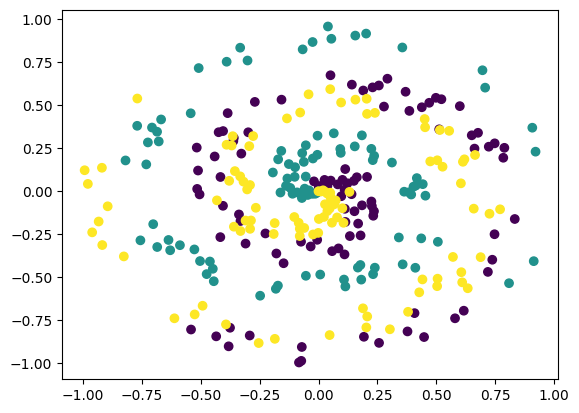

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

### Vertical Data

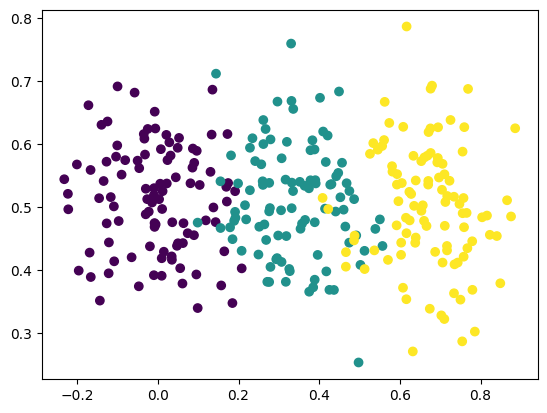

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

## Backward Pass

### Simple Dense Model
One forward and one backward.

In [10]:
import numpy as np

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(4, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=4)
activation2 = Softmax()
loss_function = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
print("loss:", loss)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y)
print("acc:", accuracy)

loss_function.backward(activation2.outputs, y)
activation2.backward(loss_function.dinputs)
dense2.backward(activation2.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

loss: 1.0984005775914036
acc: 0.33666666666666667


### Gradients

Calculated gradients after one iteration.

**Dense 1 Weight Gradient**

In [11]:
dense1.dweights

array([[-0.00071559,  0.00187496],
       [-0.00046237,  0.00223019],
       [ 0.00032384, -0.0032859 ],
       [-0.00022152, -0.00107692]])

**Dense 1 Bias Gradient**

In [12]:
dense1.dbiases

array([-3.48558478e-03, -5.89122652e-03,  2.53658969e-05,  3.36795575e-03])

**Dense 2 Weight Gradient**

In [13]:
dense2.dweights

array([[-1.63884918e-04, -2.51621415e-04,  5.68973208e-04,
        -1.91322800e-03],
       [-5.45017924e-04,  2.98776947e-04, -1.67768442e-03,
         2.32309006e-03],
       [ 7.08902843e-04, -4.71555327e-05,  1.10871121e-03,
        -4.09862063e-04]])

**Dense 2 Bias Gradient**

In [14]:
dense2.dbiases

array([-3.25719746e-05,  2.35279898e-04, -2.02707923e-04])

## Optimizing Parameters 

### SGD 

* Learning rate: 1.0
* Decay: 0.0
* Momentum: 0.0
* Epoch: 10000

In [15]:
from src.optimizers import SGD

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0, acc: 0.383, loss: 1.096, lr: 1.0


KeyboardInterrupt: 

### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* Momentum: 0.0
* Epoch: 10000

In [ ]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(decay=0.001)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.313, loss: 1.100, lr: 1.0
epoch: 1000, acc: 0.447, loss: 1.011, lr: 0.5002501250625312
epoch: 2000, acc: 0.563, loss: 0.945, lr: 0.33344448149383127
epoch: 3000, acc: 0.590, loss: 0.874, lr: 0.25006251562890724
epoch: 4000, acc: 0.660, loss: 0.813, lr: 0.2000400080016003
epoch: 5000, acc: 0.673, loss: 0.759, lr: 0.16669444907484582
epoch: 6000, acc: 0.700, loss: 0.716, lr: 0.1428775539362766
epoch: 7000, acc: 0.720, loss: 0.678, lr: 0.12501562695336915
epoch: 8000, acc: 0.750, loss: 0.639, lr: 0.11112345816201799
epoch: 9000, acc: 0.753, loss: 0.610, lr: 0.1000100010001
epoch: 10000, acc: 0.770, loss: 0.586, lr: 0.09091735612328393


### SGD 

* Learning rate: 1.0
* **Decay: 0.001**
* **Momentum: 0.9**
* Epoch: 10000

In [ ]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = SGD(learning_rate=1, decay=0.001, momentum=0.9)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.343, loss: 1.099, lr: 1
epoch: 1000, acc: 0.717, loss: 0.514, lr: 0.5002501250625312
epoch: 2000, acc: 0.747, loss: 0.477, lr: 0.33344448149383127
epoch: 3000, acc: 0.753, loss: 0.456, lr: 0.25006251562890724
epoch: 4000, acc: 0.753, loss: 0.449, lr: 0.2000400080016003
epoch: 5000, acc: 0.777, loss: 0.435, lr: 0.16669444907484582
epoch: 6000, acc: 0.780, loss: 0.424, lr: 0.1428775539362766
epoch: 7000, acc: 0.783, loss: 0.419, lr: 0.12501562695336915
epoch: 8000, acc: 0.787, loss: 0.416, lr: 0.11112345816201799
epoch: 9000, acc: 0.787, loss: 0.415, lr: 0.1000100010001
epoch: 10000, acc: 0.787, loss: 0.414, lr: 0.09091735612328393


### AdaGrad 

* Learning rate: 1.0
* Decay: 0.0
* Epsilon: 1e-7
* Epoch: 10000

In [ ]:
from src.optimizers import AdaGrad

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = AdaGrad()
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.237, loss: 1.102, lr: 1.0
epoch: 1000, acc: 0.647, loss: 0.728, lr: 1.0
epoch: 2000, acc: 0.717, loss: 0.616, lr: 1.0
epoch: 3000, acc: 0.753, loss: 0.561, lr: 1.0
epoch: 4000, acc: 0.793, loss: 0.465, lr: 1.0
epoch: 5000, acc: 0.823, loss: 0.422, lr: 1.0
epoch: 6000, acc: 0.847, loss: 0.405, lr: 1.0
epoch: 7000, acc: 0.853, loss: 0.389, lr: 1.0
epoch: 8000, acc: 0.857, loss: 0.378, lr: 1.0
epoch: 9000, acc: 0.860, loss: 0.370, lr: 1.0
epoch: 10000, acc: 0.860, loss: 0.364, lr: 1.0


### RMSProp 

* Learning rate: 0.001
* **Decay: 1e-4**
* Epsilon: 1e-7
* Rho: 0.9
* Epoch: 10000

In [ ]:
from src.optimizers import RMSProp

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = RMSProp(decay=1e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.380, loss: 1.098, lr: 0.001
epoch: 1000, acc: 0.610, loss: 0.937, lr: 0.0009091735612328393
epoch: 2000, acc: 0.657, loss: 0.814, lr: 0.0008334027835652972
epoch: 3000, acc: 0.703, loss: 0.714, lr: 0.0007692899453804139
epoch: 4000, acc: 0.727, loss: 0.648, lr: 0.0007143367383384526
epoch: 5000, acc: 0.770, loss: 0.597, lr: 0.0006667111140742716
epoch: 6000, acc: 0.810, loss: 0.559, lr: 0.0006250390649415589
epoch: 7000, acc: 0.817, loss: 0.528, lr: 0.0005882698982293077
epoch: 8000, acc: 0.827, loss: 0.505, lr: 0.0005555864214678594
epoch: 9000, acc: 0.847, loss: 0.483, lr: 0.0005263434917627244
epoch: 10000, acc: 0.857, loss: 0.466, lr: 0.0005000250012500625


### Adam 

* Learning rate: 0.001
* Decay: 0.0
* Epsilon: 1e-7
* Beta 1: 0.9
* Beta 2: 0.999
* Epoch: 10000

In [16]:
from src.optimizers import Adam

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam()

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.303, loss: 1.106, lr: 0.001


KeyboardInterrupt: 

### Testing

Performance of the last model.

In [ ]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.753, loss: 0.700


## Regularization

### L1 and L2 Regularization

In [ ]:
X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam(learning_rate=0.02, decay=5e-7)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


epoch: 0, acc: 0.287, loss: 1.104, (data loss:1.103, reg loss:0.001), lr: 0.02
epoch: 1000, acc: 0.917, loss: 0.396, (data loss:0.233, reg loss:0.163), lr: 0.019990014987513734
epoch: 2000, acc: 0.933, loss: 0.325, (data loss:0.189, reg loss:0.136), lr: 0.019980029960054924
epoch: 3000, acc: 0.933, loss: 0.291, (data loss:0.170, reg loss:0.120), lr: 0.01997005490267344
epoch: 4000, acc: 0.937, loss: 0.265, (data loss:0.155, reg loss:0.110), lr: 0.019960089800444013
epoch: 5000, acc: 0.940, loss: 0.248, (data loss:0.146, reg loss:0.102), lr: 0.01995013463847114
epoch: 6000, acc: 0.947, loss: 0.235, (data loss:0.139, reg loss:0.096), lr: 0.019940189401889033
epoch: 7000, acc: 0.947, loss: 0.225, (data loss:0.134, reg loss:0.091), lr: 0.019930254075861523
epoch: 8000, acc: 0.947, loss: 0.215, (data loss:0.128, reg loss:0.087), lr: 0.019920328645581995
epoch: 9000, acc: 0.960, loss: 0.208, (data loss:0.124, reg loss:0.084), lr: 0.019910413096273318
epoch: 10000, acc: 0.943, loss: 0.203, (d

### Testing

Performance of the last model.

In [ ]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.857, loss: 0.405


### Dropout Layer

In [ ]:
from src.layers import Dropout

X, y = spiral_data(n_samples=100, n_classes=3)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dropout = Dropout(0.1)
dense2 = Dense(3, n_inputs=64)
activation2 = Softmax()

loss_function = SparseCategoricalCrossentropy()

optimizer = Adam(learning_rate=0.05, decay=5e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dropout.forward(activation1.outputs)
    dense2.forward(dropout.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = np.argmax(activation2.outputs, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")

    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.333, loss: 1.100, (data loss:1.099, reg loss:0.001), lr: 0.05
epoch: 1000, acc: 0.690, loss: 0.966, (data loss:0.711, reg loss:0.255), lr: 0.03334444814938313
epoch: 2000, acc: 0.737, loss: 0.919, (data loss:0.627, reg loss:0.293), lr: 0.025006251562890724
epoch: 3000, acc: 0.720, loss: 0.905, (data loss:0.599, reg loss:0.305), lr: 0.02000400080016003
epoch: 4000, acc: 0.740, loss: 0.860, (data loss:0.548, reg loss:0.312), lr: 0.01666944490748458
epoch: 5000, acc: 0.737, loss: 0.929, (data loss:0.608, reg loss:0.320), lr: 0.014287755393627663
epoch: 6000, acc: 0.753, loss: 0.862, (data loss:0.534, reg loss:0.327), lr: 0.012501562695336917
epoch: 7000, acc: 0.710, loss: 0.910, (data loss:0.583, reg loss:0.327), lr: 0.0111123458162018
epoch: 8000, acc: 0.707, loss: 0.946, (data loss:0.615, reg loss:0.331), lr: 0.010001000100010001
epoch: 9000, acc: 0.747, loss: 0.952, (data loss:0.618, reg loss:0.335), lr: 0.009091735612328393
epoch: 10000, acc: 0.740, loss: 0.906, (data

### Testing

Performance of the last model.

In [ ]:
X_test, y_test = spiral_data(n_samples=100, n_classes=3)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = np.argmax(activation2.outputs, axis=1)
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.760, loss: 0.647


## Binary Logistic Regression

In [18]:
from src.layers import Sigmoid
from src.losses import BinaryCrossentropy

X, y = spiral_data(n_samples=100, n_classes=2)
y = y.reshape(-1, 1)

dense1 = Dense(64, n_inputs=2, l2_w=5e-4, l2_b=5e-4)
activation1 = ReLU()
dense2 = Dense(1, n_inputs=64)
activation2 = Sigmoid()

loss_function = BinaryCrossentropy()

optimizer = Adam(decay=5e-4)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.outputs)
    dense2.forward(activation1.outputs)
    activation2.forward(dense2.outputs)

    data_loss = loss_function.calculate(y_true=y, y_pred=activation2.outputs)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss

    predictions = (activation2.outputs > 0.5) * 1
    accuracy = np.mean(predictions == y)

    if not epoch % 1000:
        print(f"epoch: {epoch}, " +
              f"acc: {accuracy:.3f}, " +
              f"loss: {loss:.3f}, (data loss: {data_loss:.3f}, reg loss: {regularization_loss:.3f}), " +
              f"lr: {optimizer.current_learning_rate}")
        
    loss_function.backward(activation2.outputs, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.500, loss: 0.693, (data loss:0.693, reg loss:0.001), lr: 0.001
epoch: 1000, acc: 0.705, loss: 0.600, (data loss:0.583, reg loss:0.017), lr: 0.0006668889629876625
epoch: 2000, acc: 0.780, loss: 0.537, (data loss:0.493, reg loss:0.045), lr: 0.0005001250312578144
epoch: 3000, acc: 0.805, loss: 0.504, (data loss:0.442, reg loss:0.061), lr: 0.0004000800160032006
epoch: 4000, acc: 0.840, loss: 0.468, (data loss:0.395, reg loss:0.073), lr: 0.0003333888981496916
epoch: 5000, acc: 0.870, loss: 0.429, (data loss:0.346, reg loss:0.084), lr: 0.00028575510787255323
epoch: 6000, acc: 0.935, loss: 0.400, (data loss:0.308, reg loss:0.092), lr: 0.0002500312539067383
epoch: 7000, acc: 0.940, loss: 0.380, (data loss:0.280, reg loss:0.100), lr: 0.000222246916324036
epoch: 8000, acc: 0.940, loss: 0.363, (data loss:0.257, reg loss:0.107), lr: 0.00020002000200020003
epoch: 9000, acc: 0.950, loss: 0.349, (data loss:0.238, reg loss:0.112), lr: 0.00018183471224656787
epoch: 10000, acc: 0.950, l

### Testing

Performance of the last model.

In [21]:
X_test, y_test = spiral_data(n_samples=100, n_classes=2)
y_test = y_test.reshape(-1, 1)

dense1.forward(X_test)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss = loss_function.calculate(y_true=y_test, y_pred=activation2.outputs)

predictions = (activation2.outputs > 0.5) * 1
accuracy = np.mean(predictions == y_test)

print(f"validation -> " + f"acc: {accuracy:.3f}, " + f"loss: {loss:.3f}")

validation -> acc: 0.900, loss: 0.311
